# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Simulated_Ads_CTR_Optimisation.csv')
# In the simulated data each row represents a user and the columns indicate which ad the user would click

## Implementing UCB

In [3]:
# N = number of simulated customers
N = len(dataset)

# d = number of different ads (or one armed bandits)
d = len(dataset.columns)

# list of selected ads in order
ads_selected = []

# the sum of rewards of the ad i
sums_of_rewards = np.array([0] * d, dtype=float)

# the number of times ad i has been selected
numbers_of_selections = np.array([0] * d, dtype=float)

# Just for visualizing
ucbs = []
cumulative_selections = []
new_state = [0] * d
selected_ads = []

# total reward accumulated
total_reward = 0

for n in range(N):
    # r = average award of ad i
    r = np.divide(sums_of_rewards, numbers_of_selections, out=np.zeros_like(sums_of_rewards), where=numbers_of_selections!=0)
    
    # confidence interval for ad i
    delta = np.sqrt(3/2 * np.divide([np.log(n+1)] * d, numbers_of_selections, out=np.zeros_like([np.log(n+1)] * d), where=numbers_of_selections!=0))
    
    # select ad with the highest upper confidence bound
    ad = np.argmax(numbers_of_selections == 0) or np.argmax(r + delta)
    
    # update number of selections for the ad
    numbers_of_selections[ad] += 1
    
    # update sum with simulated reward of showing the add
    reward = dataset.iat[n, ad]
    sums_of_rewards[ad] += reward
    
    # update the total reward sum
    total_reward += reward

    
    ### Just for visualization:
    
    # update list of selected ads
    ads_selected.append(ad)
    
    # update list of upper confidence bounds
    ucbs.append(r + delta)
    
    # update cumulative selections
    new_state[ad] += 1
    cumulative_selections.append(new_state.copy())
    
    selected_ad = [0] * d
    selected_ad[ad] = 1
    selected_ads.append(selected_ad)
    
sums_of_rewards = sums_of_rewards.astype(int)
numbers_of_selections = numbers_of_selections.astype(int)
total_reward = total_reward.astype(int)

print(total_reward)


2178


## Visualising the results

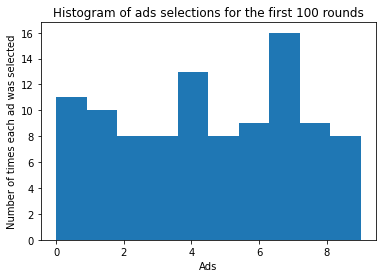

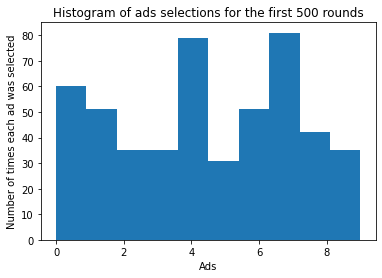

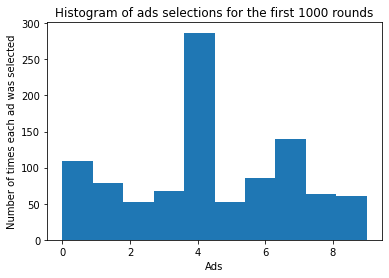

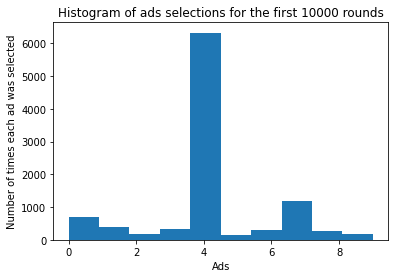

In [4]:
for n in [100, 500, 1000, N]:
    plt.hist(ads_selected[:n])
    plt.title(f'Histogram of ads selections for the first {n} rounds')
    plt.xlabel("Ads")
    plt.ylabel("Number of times each ad was selected")
    plt.show()

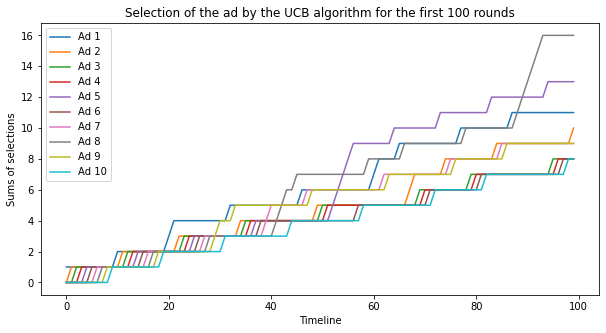

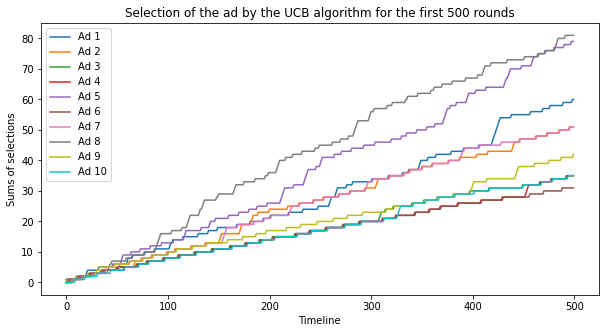

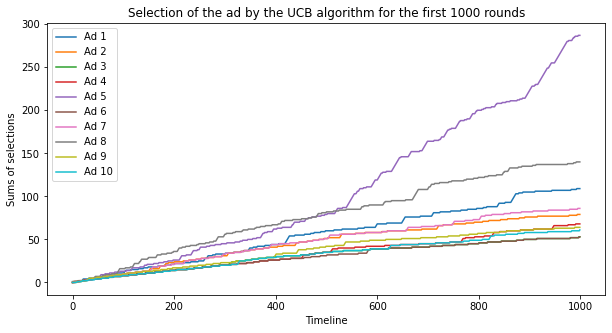

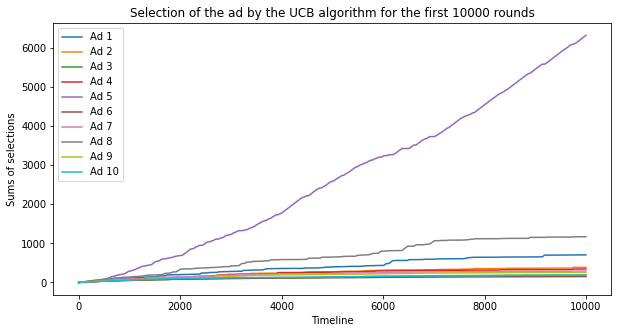

In [5]:
df = pd.DataFrame(cumulative_selections, columns = ["Ad 1", "Ad 2", "Ad 3", "Ad 4", "Ad 5", "Ad 6", "Ad 7", "Ad 8", "Ad 9", "Ad 10"])
for n in [100, 500, 1000, N]:
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(df[:n], label= df.columns.values)
    plt.title(f'Selection of the ad by the UCB algorithm for the first {n} rounds')
    plt.xlabel("Timeline")
    plt.ylabel("Sums of selections")
    plt.legend()
    plt.show()

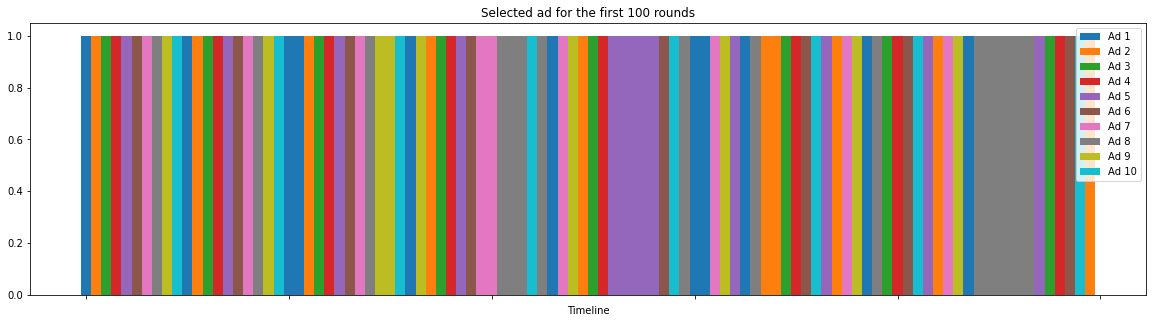

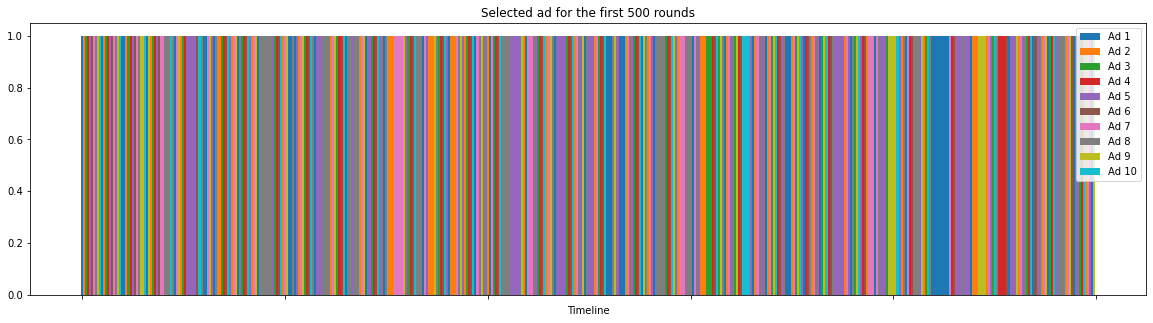

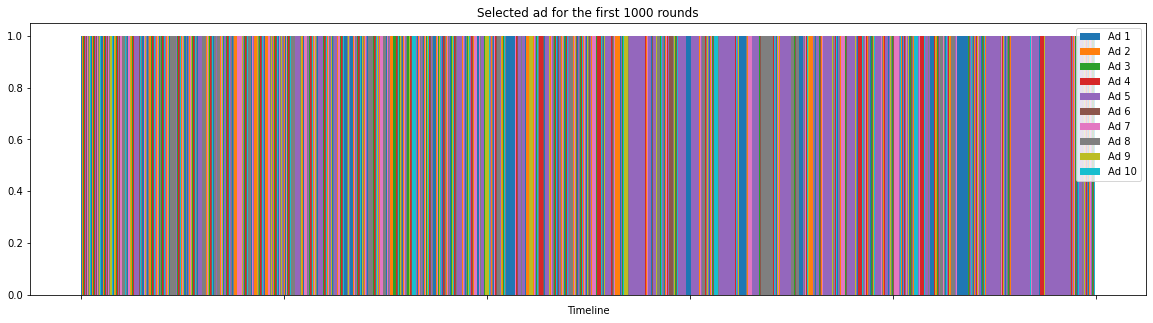

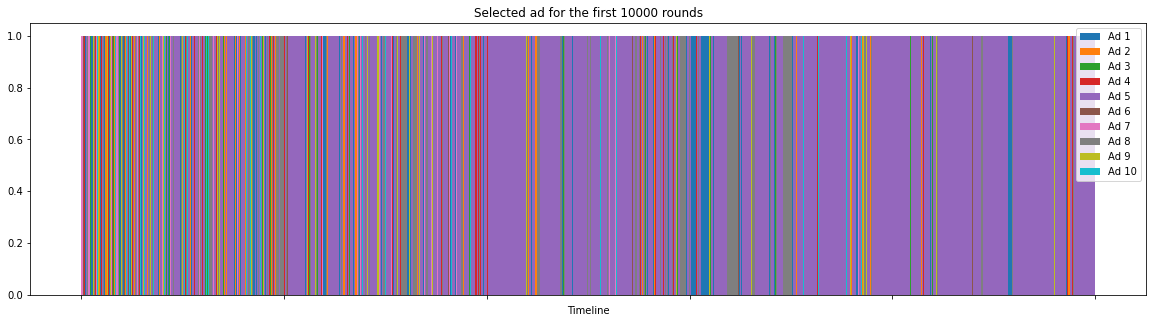

In [6]:
for n in [100, 500, 1000, N]:
    df = pd.DataFrame(selected_ads[:n], columns = ["Ad 1", "Ad 2", "Ad 3", "Ad 4", "Ad 5", "Ad 6", "Ad 7", "Ad 8", "Ad 9", "Ad 10"])
    width = 1.0
    plt.rcParams["figure.figsize"] = (20,5)
    fig, ax = plt.subplots()
    ad1=list(df.iloc[:,0])
    ad2=list(df.iloc[:,1])
    ad3=list(df.iloc[:,2])
    ad4=list(df.iloc[:,3])
    ad5=list(df.iloc[:,4])
    ad6=list(df.iloc[:,5])
    ad7=list(df.iloc[:,6])
    ad8=list(df.iloc[:,7])
    ad9=list(df.iloc[:,8])
    ad10=list(df.iloc[:,9])
    ax.bar(range(n), ad1, width, label='Ad 1')
    ax.bar(range(n), ad2, width, label='Ad 2')
    ax.bar(range(n), ad3, width, label='Ad 3')
    ax.bar(range(n), ad4, width, label='Ad 4')
    ax.bar(range(n), ad5, width, label='Ad 5')
    ax.bar(range(n), ad6, width, label='Ad 6')
    ax.bar(range(n), ad7, width, label='Ad 7')
    ax.bar(range(n), ad8, width, label='Ad 8')
    ax.bar(range(n), ad9, width, label='Ad 9')
    ax.bar(range(n), ad10, width, label='Ad 10')
    ax.set_title(f'Selected ad for the first {n} rounds')
    ax.legend(loc='upper right')
    ax.axes.xaxis.set_ticklabels([])
    plt.xlabel("Timeline")
    plt.show()

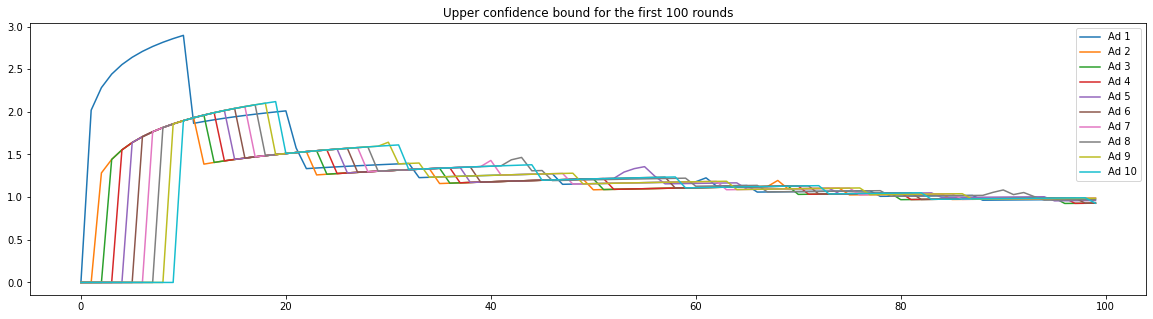

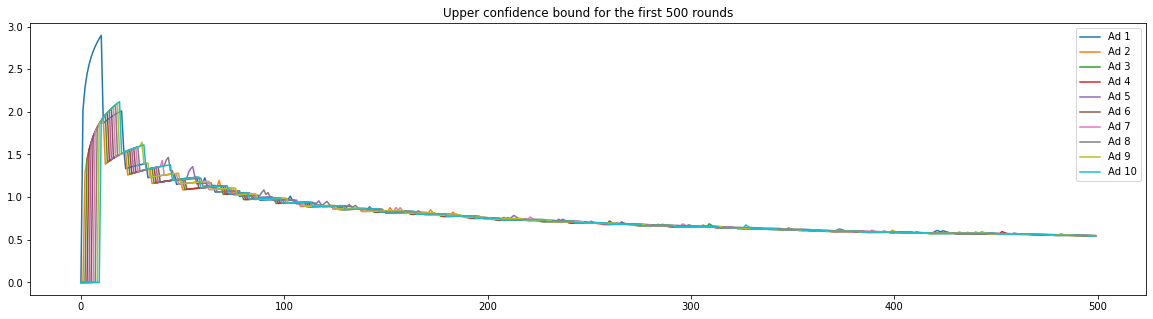

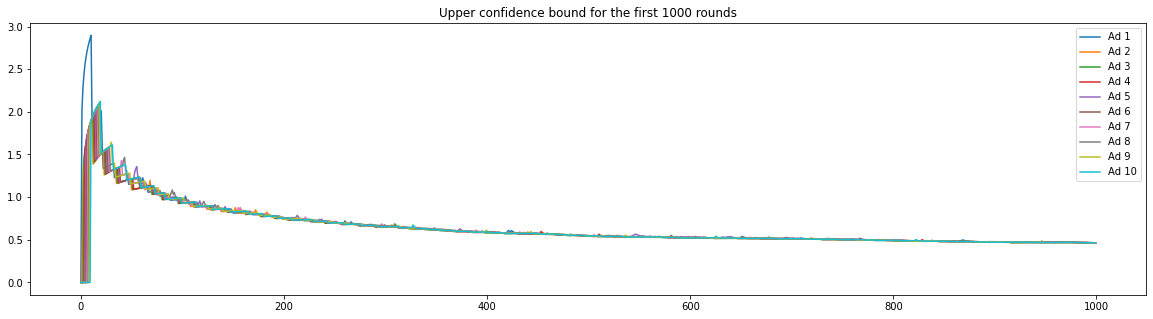

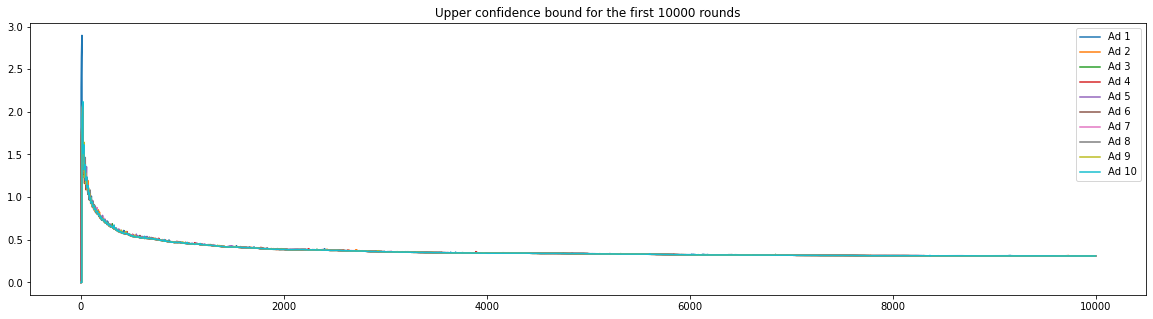

In [7]:
df = pd.DataFrame(ucbs, columns = ["Ad 1", "Ad 2", "Ad 3", "Ad 4", "Ad 5", "Ad 6", "Ad 7", "Ad 8", "Ad 9", "Ad 10"])
for n in [100, 500, 1000, N]:
    plt.rcParams["figure.figsize"] = (20,5)
    plt.plot(df[:n], label= df.columns.values)
    plt.title(f'Upper confidence bound for the first {n} rounds')
    plt.legend()
    plt.show()